# Imports

In [24]:
from Mohler_analysis import DICOM_Images_calibration as dcmisc
from Mohler_analysis import DICOM_Image as dcim
from Mohler_analysis import SPR
import numpy as np
import matplotlib.pyplot as plt

# Calibration procedure

### Data

In [25]:
fp1="1.3.12.2.1107.5.1.4.83580.30000022050507293627700001700.dcm"
fp2="1.3.12.2.1107.5.1.4.83580.30000022050507293627700001720.dcm"
inserts_densities=np.array((5.086,5.4,5,3.454,5.915,3.481,3.434,3.325,3.34,4,3.476,3.624,3.863,3.448,4.283,3.47,3.171,3.194))*1e23
# inserts_densities_err=np.array((5.086,1.2,1.6,3.454,5.915,3.481,3.434,3.325,3.34,4,3.476,3.624,3.863,3.448,4.283,3.47,3.171,3.194))*1e10
inserts_densities_err=np.array((1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1))*1e15
# I values and errors are guesses
I_values=np.array((120,120,120,56,130,70,65,69,90,71,77,120,120,83,89,91,64))
I_values_err=np.array((4,3,2,1,3,6,6,4,4,3,3,2,2,2,2,2,2))

### Data setup for code execution

In [26]:
fps=np.array((fp1,fp2,fp1))
d=dcmisc(fps)

## Calibration

In [27]:
fit=d.calibration_fit(inserts_densities,inserts_densities_err,0.5,I_values,I_values_err,0.5,2)
alpha=d.alpha_blending(inserts_densities,inserts_densities_err)
# both can be save to text file and read off it, calibration performed only once on phantom

# Post Calibration deriving quantities for SPR determination

### Data = file_path of image for which SPR is to be determined

In [28]:
fp_high="1.3.12.2.1107.5.1.4.83580.30000022050507293627700001720.dcm"
fp_low="1.3.12.2.1107.5.1.4.83580.30000022050507293627700001700.dcm"

### Data setup for code execution

In [29]:
fps=np.array((fp_high,fp_low,fp1))

### Code execution - SPR prediction

In [30]:
d=SPR(fps,fit,alpha,((0.5,0.5,0.5))) #if run for DECT the last paramater is float, if run for PCCT the last paramater is \
# array of floats of length equal to length of the number of PCCT images
out=d.spr_map()

# SPR map

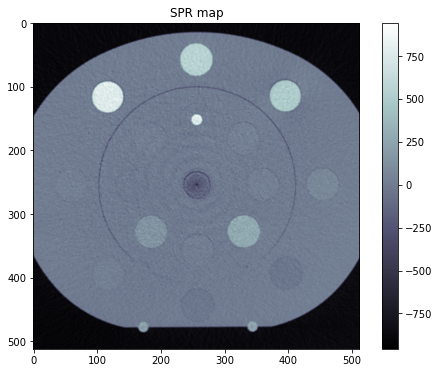

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
shw = ax.imshow(out[0],cmap=plt.cm.bone)
bar = plt.colorbar(shw)
plt.title('SPR map')
plt.show()

Comments: air/water density ratio = around -820. That's also seen here. 

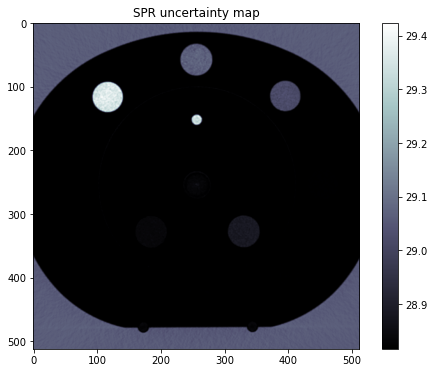

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
shw = ax.imshow(out[1],cmap=plt.cm.bone)
bar = plt.colorbar(shw)
plt.title('SPR uncertainty map')
plt.show()

Comments: assumption water density is well known, accuracy 1e5. Assuming uncertainty in densities of inserts is bigger, so 1e15. 

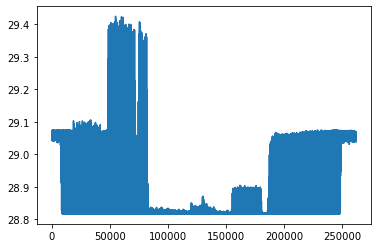

In [33]:
tmp=out[1].flatten()
plt.plot(tmp)
plt.show()